## Imports

In [1]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score

# Custom
import sys,os
sys.path.append( '.' )
sys.path.append( '..' )
import Components.Outlier_Detection as Outlier_Detection
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
#import Components.Data_Augmentation as Data_Augmentation
import Components.wrapper as wrapper


# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
#importlib.reload(Data_Augmentation)
importlib.reload(Outlier_Detection)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(wrapper)

<module 'Components.wrapper' from '../Components/wrapper.py'>

## Data Preprocessing

### Data Import

In [2]:
x_train, y_train = data_fetching.get_train_data()
x_test = data_fetching.get_test_data()

## Model

### Pipeline Setup

In [3]:
# we need: -scaling transformer -weighted loss function -multi-class model 
pipe = Pipeline([('scaling',StandardScaler()),
                 ('classification',
                  SVC(C=1.0,kernel='rbf',gamma='scale',shrinking=True,cache_size=1000,class_weight='balanced'))
                ])


### Grid search

In [4]:


gamma_range = np.logspace(-5, -3, 3)
parameters = [{'classification__kernel': ['rbf'], 'classification__gamma': [0.0001],'classification__C': [1.5,1.75,2.25,2.5,2.75,3.25,3.5,3.75,4.25,4.5]},
              {'classification__kernel': ['linear'], 'classification__C': [0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009]}
             ]

clf = GridSearchCV(pipe, parameters,cv=10,n_jobs=16,scoring='balanced_accuracy')
clf.fit(x_train, np.ravel(y_train))

# View The Best Parameters
print(clf.best_params_)

{'classification__C': 4.25, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}


In [5]:
print(clf.best_score_)

0.7039814814814814


In [6]:
results = pd.DataFrame(clf.cv_results_)

In [7]:
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth",200) 
results[["params","mean_test_score"]] #.query('mean_test_score >= 0.69')

,params,mean_test_score
0,"{'classification__C': 1.5, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.697685
1,"{'classification__C': 1.75, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.700833
2,"{'classification__C': 2.25, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.702407
3,"{'classification__C': 2.5, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.700926
4,"{'classification__C': 2.75, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.699167
5,"{'classification__C': 3.25, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.702685
6,"{'classification__C': 3.5, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.702963
7,"{'classification__C': 3.75, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.702963
8,"{'classification__C': 4.25, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.703981
9,"{'classification__C': 4.5, 'classification__gamma': 0.0001, 'classification__kernel': 'rbf'}",0.702778


## Final prediction

Train Score: 0.8162962962962963


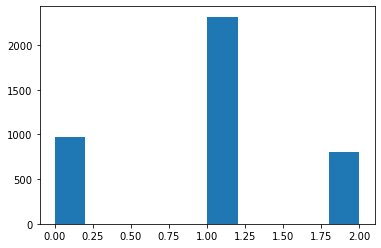

In [8]:

print("Train Score:", balanced_accuracy_score(y_train, clf.predict(x_train)))

y_pred = clf.predict(x_test)
plt.hist(y_pred)


y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])


In [9]:
y_pred_pd.to_csv('../../P/SVM_optimised_4.csv', index_label='id')

FileNotFoundError: [Errno 2] No such file or directory: '../../P/SVM_optimised_4.csv'